In [19]:
import os
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'

In [15]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [4]:
# Load model for feature extraction
model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


In [5]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = (img_data)
    features = model.predict(img_data)
    return features

In [6]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 210ms/step


In [7]:
# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 197ms/step


In [8]:
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])


In [9]:
# Train Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_train_flat, y_train)


DecisionTreeClassifier()

In [10]:
# Predict on test set
y_pred = clf.predict(x_test_flat)

In [11]:
# Evaluate model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.56


In [12]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       1.00      0.80      0.89         5
           2       0.33      0.20      0.25         5
           3       0.38      0.60      0.46         5
           4       0.71      1.00      0.83         5

    accuracy                           0.56        25
   macro avg       0.55      0.56      0.54        25
weighted avg       0.55      0.56      0.54        25



In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1 0 2 2 0]
 [0 4 0 1 0]
 [1 0 1 2 1]
 [1 0 0 3 1]
 [0 0 0 0 5]]


In [17]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       1.00      0.80      0.89         5
           2       0.33      0.20      0.25         5
           3       0.38      0.60      0.46         5
           4       0.71      1.00      0.83         5

    accuracy                           0.56        25
   macro avg       0.55      0.56      0.54        25
weighted avg       0.55      0.56      0.54        25


Accuracy: 0.56
Precision: 0.5511904761904761
Recall: 0.56
F1 Score: 0.5367521367521367


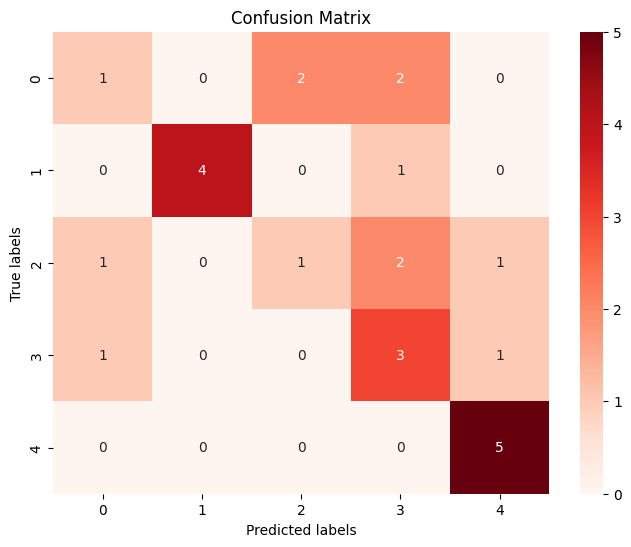

In [21]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()